## Setup

In [1]:
import numpy as np
import pandas as pd

from scipy.interpolate import LinearNDInterpolator
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colorbar import ColorbarBase
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [2]:
def rot(v,theta):
    c, s = np.cos(theta), np.sin(theta); R = np.array(((c, -s), (s, c))); return np.dot(R,v)

In [3]:
def df_from_cpp_file(filename,colnames=["phase 2","phase 1","phase 0","d_comx","d_comy","d_theta"]):
    a = []
    for l in open(filename,"r").readlines(): 
        a.append([float(x) for x in l.split(",")[:-1]])
    #df = pd.DataFrame(np.array(a),columns=["phase 2","phase 1","phase 0","d_comx","d_comy","d_theta"])
    df2 = pd.DataFrame(np.array(a),columns=colnames)
    ix = ["d_comx","d_comy"]
    df2[ix] = df2[ix][(df2[ix] > -0.001) & (df2[ix] < 0.001)]
    df2["d_theta"] = df2["d_theta"][(df2["d_theta"] > -0.1) & (df2["d_theta"] < 0.1)]
    df2[ix] = [rot(x,np.pi * 0.5) for x in df2[ix].to_numpy()]
    return df2

In [21]:
def phase_heatmap(df, colname, ax, title, size=110, minv=None, maxv=None, phase1="phase 0", phase2="phase 1"):
    if minv == None and maxv == None: 
        minv = df[colname].min(); maxv = df[colname].max()
    ax.set(xlim=(0,2),ylim=(0,2),title=title); ax.set_aspect(1)
    ax.scatter(df[phase1], df[phase2], cmap=mpl.colormaps["plasma"],marker="s",
        c=mpl.colors.Normalize(minv,maxv)(df[colname]),s=size)
    divider = make_axes_locatable(ax); cax = divider.append_axes("right", size="5%", pad=0.05)
    ColorbarBase(cax,cmap=mpl.colormaps["plasma"],norm=mpl.colors.Normalize(minv,maxv))
    
def draw_phasemaps(df):
    fig, ax = plt.subplots(1,3,figsize=(27,9)); arr = df[["d_comx","d_comy"]].to_numpy()
    mi = -0.001; ma = 0.001;
    phase_heatmap(df,"d_comx",ax[0],"CoM x-displacement",size=80,minv=mi,maxv=ma)
    phase_heatmap(df,"d_comy",ax[1],"CoM y-displacement",size=80,minv=mi,maxv=ma)
    phase_heatmap(df,"d_theta",ax[2],"angular drift",size=80)

### Compare known phasemap with cpp phasemap

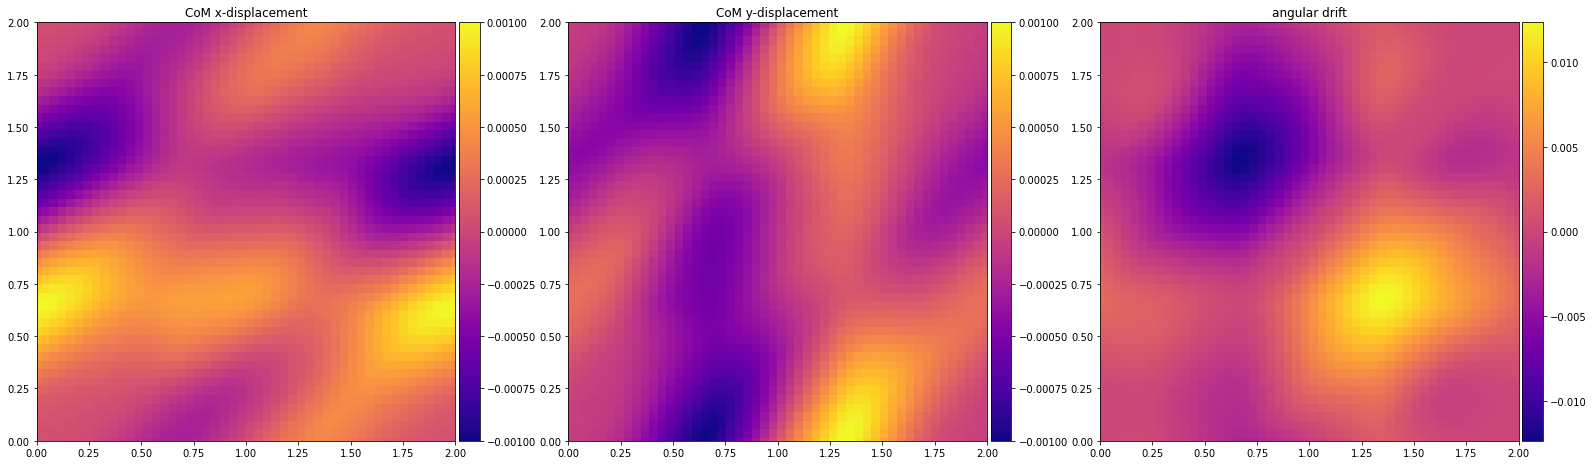

In [22]:
df1 = pd.read_csv("../data/experiment_files/19_12_2022/displacement_map_triangle_[1, 1, 1].csv")
draw_phasemaps(df1)

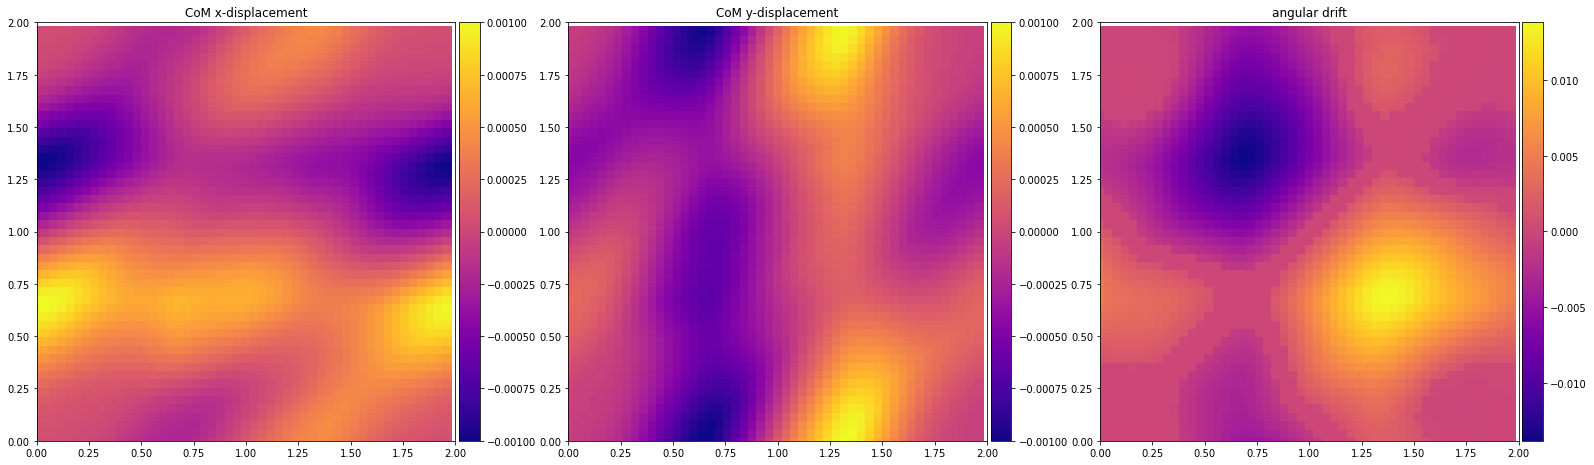

In [23]:
df2 = df_from_cpp_file("outfiles/data.txt")
draw_phasemaps(df2)

### Check if weird divergence error avoided in cpp phasemap when tolerance 10e-4 instead of 10e-5

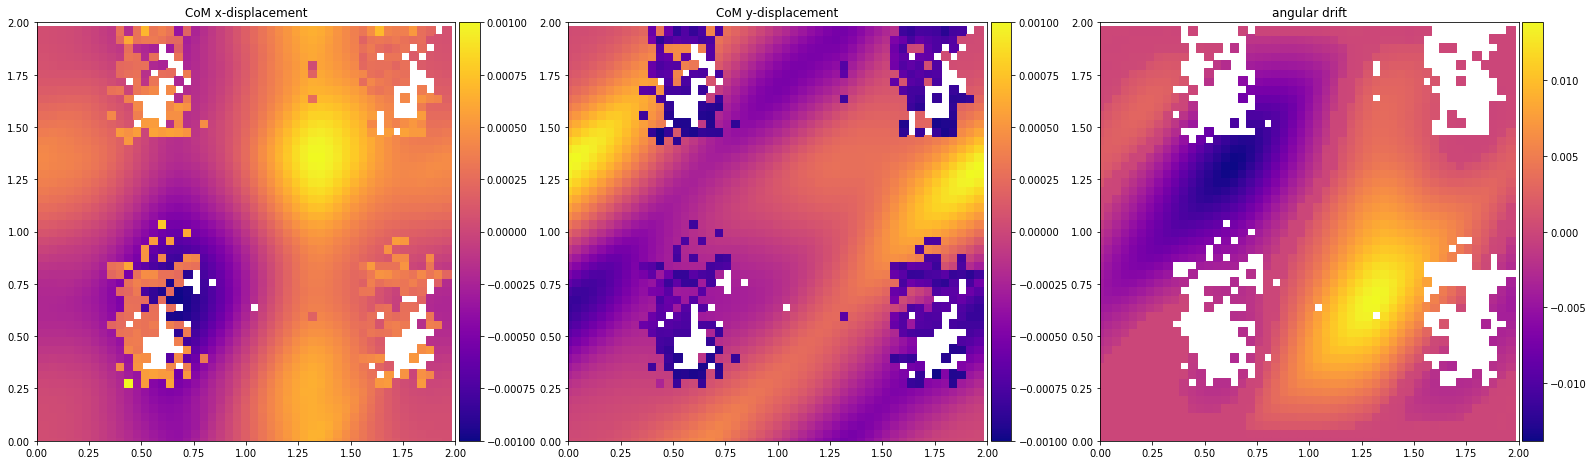

In [25]:
df3 = df_from_cpp_file("outfiles/data_weird.txt",["phase 0","phase 2","phase 1","d_comx","d_comy","d_theta"])
draw_phasemaps(df3)

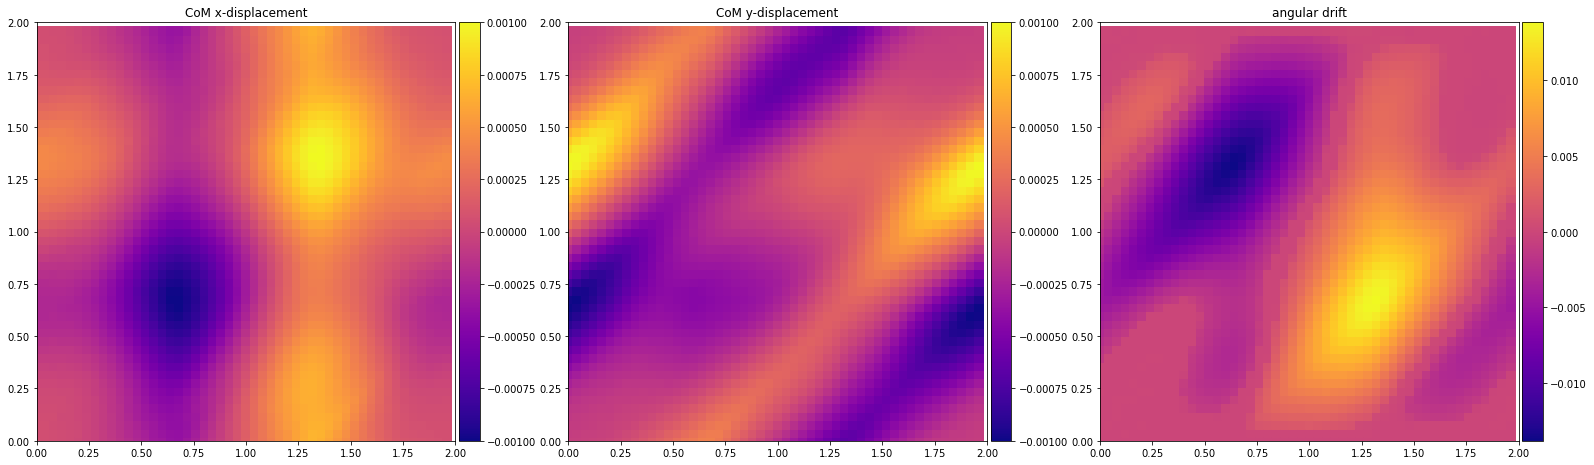

In [27]:
df4 = df_from_cpp_file("outfiles/data_weird_fixed.txt",["phase 0","phase 2","phase 1","d_comx","d_comy","d_theta"])
draw_phasemaps(df4)